In [36]:
import pandas as pd
import numpy as np
from __future__ import print_function
import cv2
import matplotlib.colors as cs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import urllib
from pyinaturalist import *
import urllib.request
from matplotlib import pyplot as plt

### Create a new observation using the user id

In [37]:
iNaturalist_Username = input()

In [38]:
# Create a new observation
observations = get_observations(user_id=iNaturalist_Username, page='all')

# df_list is used to append all the observations into a dataframe
df_list = []
# df_url is used to store image urls
df_url = []
# df_lat_long is used to store latitude and longitude
df_lat = []
df_long = []
# df_site_url is used to store site url
df_site_url = []
# Store user id and login
# df_user_id = []
df_user_login = []
# Store public/positional accuracy
# df_pos_acc = []
# df_pub_pos_acc = []

for obs in observations['results']:
    # From dict to dataframe
    df = pd.DataFrame.from_dict(obs, orient='index')
    # Get image urls
    if obs.get('photos') is not None:
        image_url = obs.get('photos')[0].get('url')
    else:
        image_url = 'None'
    # Get latitude and longitude
    # Get positional accuracy
    if obs.get('location') is not None:
        lat = obs.get('location')[0]
        lon = obs.get('location')[1]
        # pos_acc = obs.get('positional_accuracy')
        # pub_pos_acc = obs.get('public_positional_accuracy')
    else:
        lat = '             40.343137'
        lon = '             74.655070'
        # pos_acc = 'None'
        # pub_pos_acc = 'None'
    # Get site url
    if obs.get('uri') is not None:
        site_url = obs.get('uri')
    else:
        site_url = 'None'
    # Get user id and login
    if obs.get('user') is not None:
        #user_id = obs.get('user').get('id')
        user_login = obs.get('user').get('login')
    else:
        #user_id = 'None'
        user_login = 'None'
        
    # Transpose the dataframe so that rows represent images and columns are variables
    # that describe the images.
    df = df.transpose()
    df_list.append(df)
    df_url.append(image_url)
    df_lat.append(lat)
    df_long.append(lon)
    df_site_url.append(site_url)
    #df_user_id.append(user_id)
    df_user_login.append(user_login)
    # df_pos_acc.append(pos_acc)
    # df_pub_pos_acc.append(pub_pos_acc)

# Concatenate all dataframes
iNatStruct = pd.concat(df_list)

# Add updated columns to the dataframe
iNatStruct['square_image_url'] = df_url
iNatStruct['latitude'] = df_lat
iNatStruct['longitude'] = df_long
iNatStruct['site_url'] = df_site_url
#iNatStruct['user_id'] = df_user_id
iNatStruct['User'] = df_user_login
# iNatStruct['positional_accuracy'] = df_pos_acc
# iNatStruct['public_positional_accuracy'] = df_pub_pos_acc

# Replace image size from 'square' to 'medium' and 'large'
iNatStruct['Image_Link'] = iNatStruct['square_image_url'].replace('square', 'medium', regex=True)
# iNatStruct['large_image_url'] = iNatStruct['square_image_url'].replace('square', 'large', regex=True)

# Reset index and drop the old index
iNatStruct = iNatStruct.reset_index()
# iNatStruct = iNatStruct.drop(['index'], axis=1)

iNatStruct

,index,quality_grade,time_observed_at,taxon_geoprivacy,annotations,uuid,id,cached_votes_total,identifications_most_agree,species_guess,...,observation_photos,faves,non_owner_ids,observed_on,square_image_url,latitude,longitude,site_url,User,Image_Link
0,0,casual,2022-04-18T16:50:18-03:00,None,[],e2e206d6-9515-484b-aa6f-367d15bda0d8,111964021,0,False,None,...,"[{'id': 176426901, 'position': 0, 'uuid': '212...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-04-18 15:50:18-04:00,https://inaturalist-open-data.s3.amazonaws.com...,42.443093,-76.411087,https://www.inaturalist.org/observations/11196...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
1,0,casual,2022-04-18T16:51:05-03:00,None,[],761d5906-7018-4188-aae1-98bf37ebad62,111964055,0,False,None,...,"[{'id': 176426997, 'position': 0, 'uuid': 'ba1...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-04-18 15:51:05-04:00,https://inaturalist-open-data.s3.amazonaws.com...,42.443057,-76.411112,https://www.inaturalist.org/observations/11196...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
2,0,research,2022-04-18T16:51:38-03:00,None,[],2f38d65c-2717-486f-81ba-137a62c515c1,111964231,0,True,daffodils,...,"[{'id': 176427262, 'position': 0, 'uuid': 'dd3...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-04-18 15:51:38-04:00,https://inaturalist-open-data.s3.amazonaws.com...,42.443225,-76.411142,https://www.inaturalist.org/observations/11196...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
3,0,needs_id,2022-05-25T12:04:49-04:00,None,[],03638fc0-aa2b-4fac-8c06-0a9d0f13e102,118661006,0,False,None,...,"[{'id': 187182751, 'position': 0, 'uuid': '5d5...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-05-25 12:04:49-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.246193,-80.409284,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
4,0,needs_id,2022-05-25T12:07:21-04:00,open,[],7db04325-38f7-4029-9dc9-766616b94437,118661315,0,False,None,...,"[{'id': 187183218, 'position': 0, 'uuid': '9c6...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-05-25 12:07:21-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.246322,-80.409523,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
5,0,needs_id,2022-05-25T12:08:13-04:00,None,[],f504aef8-f3b0-465e-95e1-5ba8a04d2f9e,118661429,0,False,None,...,"[{'id': 187183431, 'position': 0, 'uuid': '012...",[],[],2022-05-25 12:08:13-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.246322,-80.409523,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
6,0,research,2022-05-25T12:09:03-04:00,obscured,[],7fe69598-d795-4241-9cec-c2e5c5a61151,118661513,0,True,Carolina sweetshrub,...,"[{'id': 187183813, 'position': 0, 'uuid': '533...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-05-25 12:09:03-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.350497,-80.484791,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
7,0,needs_id,2022-05-25T12:10:21-04:00,None,[],440685b3-675a-4eb7-8817-4f5964eb53f0,118661745,0,False,None,...,"[{'id': 187183850, 'position': 0, 'uuid': '3f7...",[],[],2022-05-25 12:10:21-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.246163,-80.409251,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
8,0,needs_id,2022-05-25T12:10:37-04:00,None,[],a206e84e-7183-4fea-8a91-f63dc2c04f1b,118661906,0,False,None,...,"[{'id': 187184107, 'position': 0, 'uuid': '0f7...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-05-25 12:10:37-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.246379,-80.409562,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
9,0,casual,20

## Continue on initial structured data frame 

In [39]:
# Split time_observed_at into date and time
def convertT(time):
    time = time.replace('T',' ')
    return time

(iNatStruct.time_observed_at.map(lambda t: convertT(t).split()))[0][1]

'16:50:18-03:00'

In [40]:
# Use lambda function to split time_observed_at into date and time
for i in iNatStruct.time_observed_at:    
    iNatStruct['observed_date'] = (iNatStruct.time_observed_at.map(lambda t: convertT(t).split()[0]))
    iNatStruct['observed_time'] = (iNatStruct.time_observed_at.map(lambda t: convertT(t).split()[1]))

In [41]:
# shift columns observed_date and observed_time to position 1 and 2
column1 = iNatStruct.pop('observed_date')
column2 = iNatStruct.pop('observed_time')
  
# insert column using insert
iNatStruct.insert(1, 'observed_date', column1)
iNatStruct.insert(2, 'observed_time', column2)

# delete time_observed_at column
del iNatStruct["time_observed_at"]
del iNatStruct["observed_on"]
#del iNatStruct["observed_time"]

In [42]:
# shift location column to last column
column1 = iNatStruct.pop('location')
  
# insert location column using insert
iNatStruct.insert(len(iNatStruct) - 1, 'location', column1) 
# not sure why it's not moving the column to last position

In [43]:
# Remove the characters after '-'
def removeChar(char):
    ch = "-"
    char = char.split(ch, 1)[0]
    return char

# Use lambda function to remove the characters after '-'
iNatStruct['observed_time'] = iNatStruct.observed_time.map(lambda t: removeChar(t))

In [44]:
# Rename columns
iNatStruct.rename(columns = {'species_guess':'Species', 'observed_date':'Date', 'observed_time':'Time', 'latitude':'Lat', 'longitude':'Long'}, inplace = True)

# The structured dataframe is now ready
iNatStruct = iNatStruct[["Image_Link", "Species", "User", "Date", "Time", "Lat", "Long"]]

# Add p_ column
p_lab = ['p'+str(s+1) for s in iNatStruct.index]
iNatStruct.insert(0, "Image_Label", p_lab)

# Sort DataFrame by date and time
iNatStruct = iNatStruct.sort_values(['Date', 'Time'], ascending = [True, True])

iNatStruct.head()

,Image_Label,Image_Link,Species,User,Date,Time,Lat,Long
0,p1,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-04-18,16:50:18,42.443093,-76.411087
1,p2,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-04-18,16:51:05,42.443057,-76.411112
2,p3,https://inaturalist-open-data.s3.amazonaws.com...,daffodils,llhouse2,2022-04-18,16:51:38,42.443225,-76.411142
3,p4,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:04:49,37.246193,-80.409284
4,p5,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:07:21,37.246322,-80.409523


# Jubilee's color observation code

## Show percentage of dominant (most frequent) color within image using kmeans

In [45]:
def colorHistFeatures(image):
    features = []      
    ## 1st bin (R=0-32,G=0-32,B=0-32),2nd bin (R=33-64,G=0-32,B=0-32)--> totally 512 bins
    hist = cv2.calcHist([image], [0, 1, 2], None, (4, 4, 4), [1, 256, 1, 256, 1, 256])
    attributeList = []
    attributeNum = 1
    for B in np.arange(hist.shape[0]):
        for G in np.arange(hist.shape[1]):
            for R in np.arange(hist.shape[2]):
                r = 'R=' + str(R*64).zfill(3) + '-' + str((R+1)*64-1).zfill(3)
                g = 'G=' + str(G*64).zfill(3) + '-' + str((G+1)*64-1).zfill(3)
                b = 'B=' + str(B*64).zfill(3) + '-' + str((B+1)*64-1).zfill(3)
                if attributeNum == 148:
                    print('(' + r +  ', ' + g + ', ' + b + '): ', int(hist[B, G, R]))
                attributeList.append((attributeNum,r,g,b))
                attributeNum += 1
#     hist = cv2.calcHist([image],[0,1,2],None,[256,256,256],[0,256,0,256,0,256])
    hist = cv2.normalize(hist, hist).flatten()
    features.extend(hist)
    return features,attributeList

In [46]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, so that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    #hist = "{:.2f}".format(hist)
    
    # return the histogram
    return hist


#hist = centroid_histogram(clt)
#print(hist)
#type(hist)

## Implement RGB color column

In [47]:
# column name list 
col_names =  ['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']
  
# create an empty dataframe
# with columns
RGBdf = pd.DataFrame(columns = col_names)
#RGBdf

In [48]:
hex_code = []
r_pix = []
g_pix = []
b_pix = []
per = []

#for img in iNatStruct.index: 
for img in iNatStruct["Image_Link"]: 
    req = urllib.request.urlopen(img)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    imgNat = cv2.imdecode(arr, -1)
    #print(img)
    
    clustNum = 3 #set number of cluster for kmeans to be 3
    #clustNum = 4 #set number of cluster for kmeans to be 4
    imgNat = cv2.cvtColor(imgNat,cv2.COLOR_BGR2RGB) #convert bgr to rgb
    n_img = np.reshape(imgNat,(imgNat.shape[0]*imgNat.shape[1],3)) #reshape img array
    clt = KMeans(n_clusters=clustNum) # kmeans to find color cluster
    clt.fit(n_img)
    labels = np.unique(clt.labels_) #get unique value of labels in kmeans
    hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1)) #find pixel numbers of each color
    colors = [] # list to hold color
    rgbVals = [] 
    #rgbVals1 = [] 
    hexlabels = [] # list to hold hex color code
    
    #get the main color
    for i in range(clt.cluster_centers_.shape[0]):
        #clust_cent = tuple(clt.cluster_centers_[i]/255)
        colors.append(tuple(clt.cluster_centers_[i]/255))
        #colors.append(clust_cent)
        for j in range(clustNum):
            rgbVals.append(clt.cluster_centers_[i][j])
        #rgbVals1.append(tuple(clt.cluster_centers_[i]))
        hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))
        
        
        # RGBdf.iloc[i] = rgbVals
        # using append
    rgbVals = [rgbVals]
    
    # add percentage
    histPer = centroid_histogram(clt)
    histPer = list(histPer)
    histPer = [round(percent,2) for percent in histPer]
    #print(histPer)
    per.append(histPer)
    
    RGBdf = RGBdf.append(pd.DataFrame(rgbVals, columns=['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']), 
                   ignore_index = True)
    #iNatStruct["hex_color_code"]
    hex_code.append(hexlabels)
    
    #for idx in range(clustNum):
    #    r_pix.append(clt.cluster_centers_[idx][0]) # R
    #    g_pix.append(clt.cluster_centers_[idx][1]) # G
    #    b_pix.append(clt.cluster_centers_[idx][2]) # G
    #r_pix.append(clt.cluster_centers_[0]) # R
    #g_pix.append(clt.cluster_centers_[1]) # G
    #b_pix.append(clt.cluster_centers_[2]) # B
    

C:\Users\18334\AppData\Local\Temp\ipykernel_12584\1078733506.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGBdf = RGBdf.append(pd.DataFrame(rgbVals, columns=['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']),
C:\Users\18334\AppData\Local\Temp\ipykernel_12584\1078733506.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGBdf = RGBdf.append(pd.DataFrame(rgbVals, columns=['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']),
C:\Users\18334\AppData\Local\Temp\ipykernel_12584\1078733506.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGBdf = RGBdf.append(pd.DataFrame(rgbVals, columns=['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']),
C:\Users\18334\AppData\Local\Temp\ipykernel_12584\1078733506.py:49:

In [49]:
#rgbVals = [rgbVals]
rgbVals
#rgbVals[0]
#rgbVals1

[
    [
        186.11586966263278,
        185.42839766979614,
        182.63252032520487,
        112.46070346684547,
        80.49537192863744,
        68.12192864355966,
        143.8342462073871,
        143.70482441286035,
        138.744251229169
    ]
]

In [50]:
# re-set index to be same as iNatStruct
RGBdf = RGBdf.set_index(iNatStruct.index)

In [51]:
# append method
#result = iNatStruct.append(RGBdf)
result = pd.concat([iNatStruct, RGBdf], axis=1)
#display(result)

In [52]:
iNatStruct = result
iNatStruct["Percentage"] = per
iNatStruct["Hex_Color_Code"] = hex_code
iNatStruct.head()

,Image_Label,Image_Link,Species,User,Date,Time,Lat,Long,R1,G1,B1,R2,G2,B2,R3,G3,B3,Percentage,Hex_Color_Code
0,p1,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-04-18,16:50:18,42.443093,-76.411087,125.772569,134.937669,109.304312,61.084817,64.257442,38.985525,183.168882,189.178488,179.471729,"[0.34, 0.31, 0.35]","[#7e876d, #3d4027, #b7bdb3]"
1,p2,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-04-18,16:51:05,42.443057,-76.411112,191.155583,200.201251,137.473539,53.209154,64.797887,28.911246,116.849701,130.013953,80.56525,"[0.23, 0.37, 0.4]","[#bfc889, #35411d, #758251]"
2,p3,https://inaturalist-open-data.s3.amazonaws.com...,daffodils,llhouse2,2022-04-18,16:51:38,42.443225,-76.411142,61.253221,58.86844,44.030604,128.786547,118.584639,96.997915,195.85244,187.0456,155.184272,"[0.32, 0.34, 0.34]","[#3d3b2c, #817761, #c4bb9b]"
3,p4,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:04:49,37.246193,-80.409284,191.343776,206.035694,221.934842,48.435281,76.717188,17.616242,97.792788,128.774756,55.871174,"[0.6, 0.18, 0.22]","[#bfcede, #304d12, #628138]"
4,p5,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:07:21,37.246322,-80.409523,162.181444,176.765587,187.693448,41.708081,72.91859,19.475203,187.582236,202.124902,220.030816,"[0.14, 0.22, 0.63]","[#a2b1bc, #2a4913, #bccadc]"


In [53]:
hist = centroid_histogram(clt)
maxPer = max(hist)
maxPer

0.456848

### masking attempt

In [54]:
# Attempt on image with background of clear white
#image6 = cv2.imread('/Users/jubls/Documents/AndroVTURCS/leaf_white.jpeg')
blurred = cv2.blur(imgNat, (3,3))
canny = cv2.Canny(blurred, 50, 200)

## find the non-zero min-max coords of canny
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

## crop the region
#cropped = image6[y1:y2, x1:x2]
#cv2.imwrite("cropped.png", cropped)

#tagged = cv2.rectangle(image6.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)
#cv2.imshow("tagged", tagged)
#cv2.waitKey()

In [55]:
# create zero matrix 
#mask = np.zeros(imgNat.shape[:2], dtype="uint8")
#cv2.rectangle(mask, (x1, y1), (x2, y2), 255, -1)
#cv2.imshow("Rectangular Mask", mask)

# apply our mask: notice the leaf in image is cropped out
#masked = cv2.bitwise_and(imgNat, imgNat, mask=mask)
#masked = cv2.bitwise_not(imgNat, imgNat, mask=mask)
#cv2.imshow("Mask Applied to Leaf Image", masked)
#cv2.waitKey(0)

In [56]:
print(imgNat.shape)
print((x2, y2))
print((x1, y1))
print(imgNat.shape[:2])
print(imgNat.shape[1])

(375, 500, 3)
(499, 374)
(0, 8)
(375, 500)
500


In [57]:
cropped_image = imgNat[280:281, 459:500]
cv2.imshow("Mask Applied to Leaf Image", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
#arr = np.asarray(bytearray(cropped_image.read()), dtype=np.uint8)
#imgNat = cv2.imdecode(arr, -1)
clustNum = 2 #set number of cluster for kmeans to be 2
n_img = np.reshape(cropped_image,(cropped_image.shape[0]*cropped_image.shape[1],3)) #reshape img array
clt = KMeans(n_clusters=clustNum) # kmeans to find color cluster
clt.fit(n_img)
labels = np.unique(clt.labels_) #get unique value of labels in kmeans
hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1)) #find pixel numbers of each color
colors = [] # list to hold color
hexlabels = [] # list to hold hex color code
col_pix = []

#get the main color
for i in range(clt.cluster_centers_.shape[0]):
    #clust_cent = tuple(clt.cluster_centers_[i]/255)
    colors.append(tuple(clt.cluster_centers_[i]/255))
    col_pix.append(tuple(clt.cluster_centers_[i]))
    #colors.append(clust_cent)
    hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))
    

In [59]:
col_pix

[
    (169.76470588235293, 170.35294117647058, 166.58823529411765),
    (159.20833333333334, 160.04166666666666, 155.54166666666666)
]

#### create pie chart for color

<Figure size 432x288 with 1 Axes>

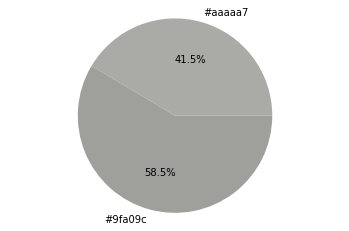

In [60]:
plt.pie(hist,labels=hexlabels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

<matplotlib.image.AxesImage object at 0x000002A00D0FA7A0>

<Figure size 432x288 with 1 Axes>

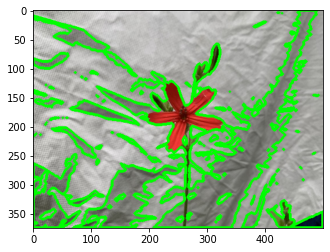

In [61]:
#img = cv.imread('test2.jpg')
imgray = cv2.cvtColor(imgNat, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(imgray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgNat, contours, -1, (0, 255, 0), 3)
plt.imshow(imgNat)

In [62]:
#arr = np.asarray(bytearray(cropped_image.read()), dtype=np.uint8)
#imgNat = cv2.imdecode(arr, -1)
clustNum = 4 #set number of cluster for kmeans to be 2
n_img = np.reshape(imgNat,(imgNat.shape[0]*imgNat.shape[1],3)) #reshape img array
clt = KMeans(n_clusters=clustNum) # kmeans to find color cluster
clt.fit(n_img)
labels = np.unique(clt.labels_) #get unique value of labels in kmeans
hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1)) #find pixel numbers of each color
colors = [] # list to hold color
#hexlabels = [] # list to hold hex color code
col_pix = []

#get the main color
for i in range(clt.cluster_centers_.shape[0]):
    #clust_cent = tuple(clt.cluster_centers_[i]/255)
    colors.append(tuple(clt.cluster_centers_[i]/255))
    col_pix.append(tuple(clt.cluster_centers_[i]))
    #colors.append(clust_cent)
    #hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))
    

In [63]:
# shows color palette
def palette(clusters):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_):
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

<matplotlib.image.AxesImage object at 0x000002A00D14F9D0>

<Figure size 432x288 with 1 Axes>

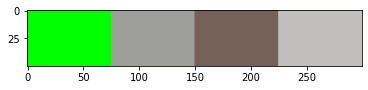

In [64]:
from pylab import *
clt = clt.fit(imgNat.reshape(-1, 3))
imshow(palette(clt))

In [65]:
#palette(clt)

# Wei's code

In [66]:
# Wei's new first block of code
#img = cv.imread('test2.jpg')
#imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#blur = cv2.GaussianBlur(imgray, (5,5), 0)
#thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [67]:
contArea = []
ratio = []
extentInfo = []
solidityInfo = []
angleInfo = []

#for img in iNatStruct.index: 
for img in iNatStruct["Image_Link"]: 
    req = urllib.request.urlopen(img)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    imgNat = cv2.imdecode(arr, -1)
    #print(img)
    
    #img = cv2.imread('test2.jpg')
    imgray = cv2.cvtColor(imgNat, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(imgray, (5,5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(imgNat, contours, -1, (0, 255, 0), 3)
    
    #plt.imshow(imgNat)
    
    # Contour Area
    #cnt = contours[1] >> throws an error for some reason..?
    cnt = contours[0] # this works
    
    # rotated rectangle
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    x1,y1,w1,h1 = cv2.boundingRect(box)
    #cv2.drawContours(img,[box],0,(0,0,255),2)
    
    aspect_ratio = float(w1)/h1
    #print(aspect_ratio)
    
    area = cv2.contourArea(cnt)
    #print(area)
    
    # Extent
    x1,y1,w1,h1 = cv2.boundingRect(cnt)
    rect_area = w1*h1
    extent = float(area)/rect_area
    #print("the extent is", extent)

    # Solidity
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    #print("the convex hull area is", hull_area)
    #solidity = float(area)/hull_area
    if hull_area == 0:
        solidity = 0
    else:
        solidity = float(area)/hull_area
    #print("the solidity is", solidity)

    # Orientation
    #(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
    #print("the angle of object is", angle)
        
    contArea.append(area)
    ratio.append(aspect_ratio)
    extentInfo.append(extent)
    solidityInfo.append(solidity)
    #angleInfo.append(angle)

In [68]:
iNatStruct["Contour_Area"] = contArea
iNatStruct["Aspect_Ratio"] = ratio
iNatStruct["Extent"] = extentInfo
iNatStruct["Solidity"] = solidityInfo
#iNatStruct["angle"] = angleInfo
iNatStruct.head()

,Image_Label,Image_Link,Species,User,Date,Time,Lat,Long,R1,G1,...,B2,R3,G3,B3,Percentage,Hex_Color_Code,Contour_Area,Aspect_Ratio,Extent,Solidity
0,p1,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-04-18,16:50:18,42.443093,-76.411087,125.772569,134.937669,...,38.985525,183.168882,189.178488,179.471729,"[0.34, 0.31, 0.35]","[#7e876d, #3d4027, #b7bdb3]",1.5,1.500000,0.250000,1.000000
1,p2,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-04-18,16:51:05,42.443057,-76.411112,191.155583,200.201251,...,28.911246,116.849701,130.013953,80.56525,"[0.23, 0.37, 0.4]","[#bfc889, #35411d, #758251]",0.0,2.000000,0.000000,0.000000
2,p3,https://inaturalist-open-data.s3.amazonaws.com...,daffodils,llhouse2,2022-04-18,16:51:38,42.443225,-76.411142,61.253221,58.86844,...,96.997915,195.85244,187.0456,155.184272,"[0.32, 0.34, 0.34]","[#3d3b2c, #817761, #c4bb9b]",2.0,1.500000,0.333333,1.000000
3,p4,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:04:49,37.246193,-80.409284,191.343776,206.035694,...,17.616242,97.792788,128.774756,55.871174,"[0.6, 0.18, 0.22]","[#bfcede, #304d12, #628138]",521.5,0.400000,0.430992,0.883898
4,p5,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:07:21,37.246322,-80.409523,162.181444,176.765587,...,19.475203,187.582236,202.124902,220.030816,"[0.14, 0.22, 0.63]","[#a2b1bc, #2a4913, #bccadc]",1403.5,6.227273,0.465660,0.932868


In [69]:
#iNatStruct.to_excel(pd.ExcelWriter, sheet_name='Sheet1', na_rep='', 
#                   float_format=None, columns=None, header=True, index=True, 
#                   index_label=None, startrow=0, startcol=0, engine=None, 
#                   merge_cells=True, encoding=None, inf_rep='inf', verbose=True, 
#                   freeze_panes=None, storage_options=None)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('iNatStruct.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
iNatStruct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
# convert to csv file
iNatStruct.to_csv('iNatStruct.csv')

In [75]:
%load_ext watermark
%watermark -v -m -p pandas,numpy,opencv-python,future,matplotlib,sklearn,urllib3,pyinaturalist,urllib.request,cv2

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.3.0

pandas        : 1.4.2
numpy         : 1.22.3
opencv-python : not installed
future        : not installed
matplotlib    : 3.5.2
sklearn       : 1.1.1
urllib3       : 1.26.9
pyinaturalist : 0.17.0
urllib.request: 3.10
cv2           : 4.5.5
__future__    : unknown

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit

